<H1>TRAINING A NEURAL NETWORK ON THE MNIST DATASET</H1>

<H2>Necessary imports</H2>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plot
import numpy as np
import random 

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

<H2>Plotting 9 random datapoints</H2>

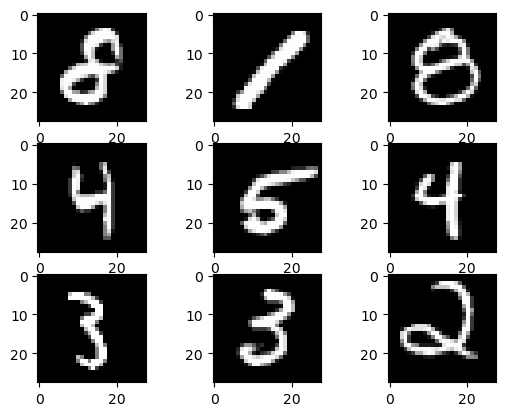

In [3]:
figure = plot.figure()
for i in range(9):
    figure.add_subplot(330+1+i)
    plot.imshow(X_train[random.randint(0, 50000), :, :], cmap=plot.get_cmap('gray'))
    #figure.add_subplot(550+2+i)
    #plot.imshow(X_train[i+5, :, :])

plot.show()


<H2>Pre-processing the data (bringing values down bw 0 and 1, changing targets to categorical targets)</H2>

In [4]:
X_train = X_train/255
X_test = X_test/255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


<H2>Creating the neural network</H2>

In [5]:
ANN = tf.keras.models.Sequential()

input_layer = tf.keras.layers.Input((28, 28))
flatten = tf.keras.layers.Flatten()
FCL_1 = tf.keras.layers.Dense(256, activation='relu')
FCL_2 = tf.keras.layers.Dense(128, activation='relu')
output_layer = tf.keras.layers.Dense(10, activation='softmax')

ANN.add(input_layer)
ANN.add(flatten)
ANN.add(FCL_1)
ANN.add(FCL_2)
ANN.add(output_layer)

ANN.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


<H2>Training</H2>

In [8]:
ANN.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0103 - accuracy: 0.9970
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0113 - accuracy: 0.9967
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0069 - accuracy: 0.9979
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0100 - accuracy: 0.9971
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0071 - accuracy: 0.9977
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0097 - accuracy: 0.9972
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0069 - accuracy: 0.9980
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0086 - accuracy: 0.9976
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0074 - accuracy: 0.9978
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.008

<H2>Testing</H2>

In [9]:
ANN.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1916 - accuracy: 0.9796


[0.19157810509204865, 0.9796000123023987]